In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules



In [2]:
df = pd.read_csv('groceries - groceries.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from mlxtend.frequent_patterns import fpgrowth

In [4]:
items = (df['Item 1'].unique())

In [5]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [6]:
ohe_df

,sweet spreads,liquor (appetizer),coffee,bags,pip fruit,berries,UHT-milk,flour,chocolate,soups,...,candles,pickled vegetables,oil,flower (seeds),frozen meals,potato products,sliced cheese,margarine,citrus fruit,semi-finished bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
freq_items = fpgrowth(ohe_df, min_support=0.02, use_colnames=True)
freq_items.head()

c:\Users\Duy Long\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [19]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1).round(3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(whole milk),0.083,0.256,0.031,0.369,1.442,0.009,1.179
1,(whole milk),(citrus fruit),0.256,0.083,0.031,0.119,1.442,0.009,1.042
2,(yogurt),(citrus fruit),0.140,0.083,0.022,0.155,1.876,0.010,1.086
3,(citrus fruit),(yogurt),0.083,0.140,0.022,0.262,1.876,0.010,1.165
4,(citrus fruit),(other vegetables),0.083,0.193,0.029,0.349,1.803,0.013,1.239
...,...,...,...,...,...,...,...,...,...
119,(whole milk),(domestic eggs),0.256,0.063,0.030,0.117,1.850,0.014,1.061
120,(domestic eggs),(whole milk),0.063,0.256,0.030,0.473,1.850,0.014,1.412
121,(other vegetables),(domestic eggs),0.193,0.063,0.022,0.115,1.814,0.010,1.058
122,(domestic eggs),(other vegetables),0.063,0.193,0.022,0.351,1.814,0.010,1.243


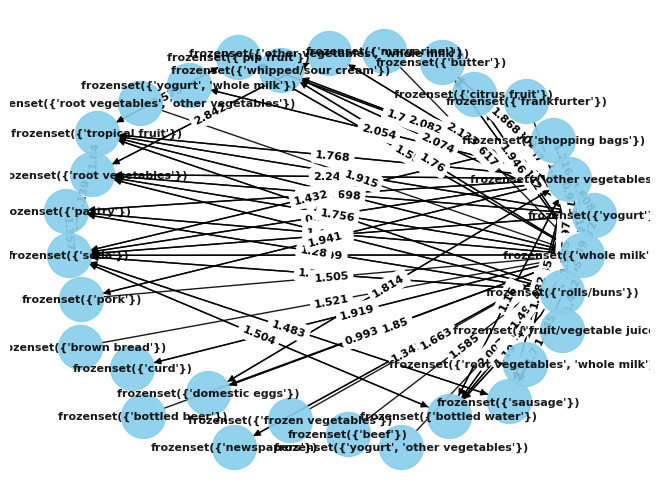

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# tạo đồ thị
G = nx.DiGraph()

# thêm các cạnh vào đồ thị
for index, row in rules.iterrows():
   G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# vẽ đồ thị
pos = nx.spring_layout(G, k=100)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, node_color='skyblue', font_weight='bold', edge_color='black', width=1, alpha=0.9)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_weight='bold')
plt.show()
